# Supplementary Post Read for Regex

## Outline

1. **Extract data from pdf invoice**
  - pdf extracter library - `pyPDF4`
  
  - Extract invoice number
  
  - Extract amounts


2. **Apply RegEx on Pandas Dataframe**
  
  - `re.sub()`
  
  - Change data in columns - `group()`, `join()`


3. **Strong Password Detector**

***

###  Extract data from a PDF invoice


Lets say you have the pdf of typical invoice of the company.


- Given a PDF https://slicedinvoices.com/pdf/wordpress-pdf-invoice-plugin-sample.pdf,
- we will see how to extract predefined key fields from this PDF
 - Assume the format is fixed.

 Dowload the pdf :

link : https://drive.google.com/file/d/1etozIXX1Wly8bIFgs4bsJbREcW4jpeG0/view?usp=sharing

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1etozIXX1Wly8bIFgs4bsJbREcW4jpeG0" -O invoice.pdf

--2022-05-25 06:56:11--  https://drive.google.com/uc?export=download&id=1etozIXX1Wly8bIFgs4bsJbREcW4jpeG0
Resolving drive.google.com (drive.google.com)... 173.194.217.138, 173.194.217.100, 173.194.217.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0k0m7jlnigtg3rice542080q7rpfadkp/1653461700000/14302370361230157278/*/1etozIXX1Wly8bIFgs4bsJbREcW4jpeG0?e=download [following]
--2022-05-25 06:56:12--  https://doc-10-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0k0m7jlnigtg3rice542080q7rpfadkp/1653461700000/14302370361230157278/*/1etozIXX1Wly8bIFgs4bsJbREcW4jpeG0?e=download
Resolving doc-10-68-docs.googleusercontent.com (doc-10-68-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-10-68-docs.googleusercontent.com (doc-10-68

In [ ]:
!pip3 install pyPDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Created wheel for pyPDF4: filename=PyPDF4-1.27.0-py3-none-any.whl size=61248 sha256=3bd7cf8aba0a2f3fda4cf6d5fbf37c8f76230ae4f20b31a4e9a8c454f1e8bfd0
  Stored in directory: /root/.cache/pip/wheels/82/db/a8/ab40e2699944d458726831fed55791a14d800e0dc5a4889869
Successfully built pyPDF4


In [ ]:
import PyPDF4

with open('invoice.pdf', mode='rb') as f:
    reader = PyPDF4.PdfFileReader(f) # ask them to understand later
    page = reader.getPage(0)
    txt = page.extractText()
    print(txt)

Invoice
Payment is due within 30 days from date of invoice. Late payment is subject to fees of 5% per month.
Thanks for choosing 
DEMO - Sliced Invoices
 | 
admin@slicedinvoices.com
Page 1/1
From:
DEMO - Sliced Invoices
Suite 5A-1204
123 Somewhere Street
Your City AZ 12345
admin@slicedinvoices.com
Invoice Number
INV-3337
Order Number
12345
Invoice Date
January 25, 2016
Due Date
January 31, 2016
Total Due
$93.50
To:
Test Business
123 Somewhere St
Melbourne, VIC 3000
test@test.com
Hrs/Qty
Service
Rate/Price
Adjust
Sub Total
1.00
Web Design
This is a sample description...
$85.00
0.00%
$85.00
Sub Total
$85.00
Tax
$8.50
Total
$93.50
ANZ Bank
ACC # 1234 1234
BSB # 4321 432
Paid



#### Lets try to extract the invoice number

In [ ]:
m = re.search("INV-[0-9]*", txt)
print(m)

<re.Match object; span=(314, 322), match='INV-3337'>


#### Similarly, lets try to extract amounts

In [ ]:
m = re.search("$[0-9]*\.[0-9]*", txt)
print(m)

None


#### Why nothing is printed? Any problem with the RE? `$[0-9]*\.[0-9]*`?

Notice the usage of `$` - remember that $ is an anchor

#### How do we search for "$"?

Add backslash in front

In [ ]:
m = re.findall("\$[0-9]*\.[0-9]*", txt)
print(m)

['$93.50', '$85.00', '$85.00', '$85.00', '$8.50', '$93.50']


#### Most imporatant amount is Total Due, lets try to extract that

In [ ]:
m = re.findall("Total Due\$[0-9]*\.[0-9]*", txt)
print(m)

[]


Whats the error now in above regex?



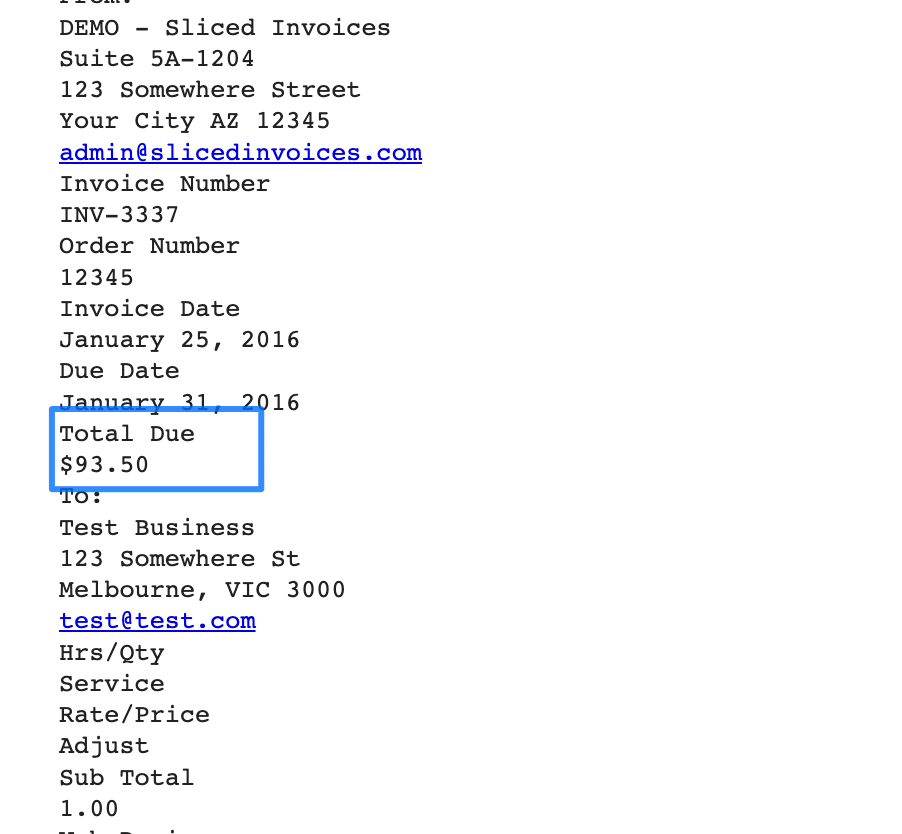

- Because of new line character after total due in data

In [ ]:
m = re.findall("Total Due\n\$[0-9]*\.[0-9]*", txt)
print(m)

NameError: ignored

***

### Apply RegEx on pandas dataframe

Till now we have seen how to apply regex to extract info on text file.

Now we are going to see how to use it on pandas df

For that ,lets first create a dataframe, which contains 3 columns, “Name” ,“Email” and "Birthday". 



In [ ]:
import pandas as pd

df = pd.DataFrame({'Name': ['Amy', 'Ben', 'Christine', 'David'],
                    'Email': ['amy.l@hotmail.com',
                              'benmartni@gmail.fr',
                              'c.mousse@example.com',
                              'd_zhang@fp.fr'],
                   'Birthday':['12/02/1992',
                               '01/12/1980',
                               '12/05/1839',
                               '05/11/1990']},
                              columns=['Name', 'Email','Birthday'])


In [ ]:
df

,Name,Email,Birthday
0,Amy,amy.l@hotmail.com,12/02/1992
1,Ben,benmartni@gmail.fr,01/12/1980
2,Christine,c.mousse@example.com,12/05/1839
3,David,d_zhang@fp.fr,05/11/1990


### Lets use RegEx to "replace" character in dataframe - `sub()`

We will also another handy function `re` library called `sub()` to substitute

As you can see e-mail addresses contain “@” to specify the second-level or string2.

#### Lets say we want to replace it to “[at]” in the dataframe. 

In [ ]:
import re
df['Email'].apply(lambda x: re.sub(r'@', '[at]', x))

0       amy.l[at]hotmail.com
1      benmartni[at]gmail.fr
2    c.mousse[at]example.com
3           d_zhang[at]fp.fr
Name: Email, dtype: object

### Lets use RegEx to modify values in some other columns

Currently we have birthday represented in the format DD/MM/YYYY

#### What if you want to change Birthday in YYYY-MM-DD format ?

- We can firstly use re.match() and Match.groups() to separate it into multiple groups, then put them in order.



In [ ]:
def date_convert(date_value):
    m = re.match(r'(\d{2})\/(\d{2})\/(\d{4})', date_value)
    return '-'.join([m.groups()[2], m.groups()[1], m.groups()[0]])

Lets call this function using `apply()` function

In [ ]:
df['Birthday']=df['Birthday'].apply(lambda x:date_convert(x))
df

,Name,Email,Birthday
0,Amy,amy.l@hotmail.com,1992-02-12
1,Ben,benmartni@gmail.fr,1980-12-01
2,Christine,c.mousse@example.com,1839-05-12
3,David,d_zhang@fp.fr,1990-11-05


***

### Strong Password Detector 

#### Write a RegEx function to check the password given to the function is stron

A strong password is defined as follows:

- At least eight characters long
- Contains one uppercase character
- Contains one lowercase character
- Has at least one digit
- Has at least one special character

#### Solution:

At first glance, this problem looks a lot harder than the previous one.

In actuality, it’s just as simple.

In [ ]:
#Here is what the skeleton of the solution looks like:

def validate_password(password):
    """ check for 
    - at least eight characters long
    - contains uppercase character 
    - contains lowercase character
    - has at least one digit
        - has at least one special character
    Args:
        password (str): password as string
    Returns:
        (bool): True if password is strong, else False
    """

In [ ]:
def validate_password(password):
    # REGEX PATTERN THAT CHECKS PASSWORD HAS AT LEAST 8 CHARACTERS
    at_least_8 = r".{8,}"
    # REGEX PATTERN THAT CHECKS PASSWORD HAS 1 LOWERCASE
    one_lowercase = r"[a-z]"
    # REGEX PATTERN THAT CHECKS PASSWORD HAS 1 UPPERCASE
    one_uppercase = r"[A-Z]"
    # REGEX PATTERN THAT CHECKS PASSWORD HAS 1 DIGIT
    one_digit = r"\d"
    # REGEX PATTERN THAT CHECKS PASSWORD HAS 1 SPECIAL CHARACTER
    special_characters = r"[!\”#$%&'()*+,-./:;<=>?@[\]^_`{|}~]"
 
    if re.search(at_least_8, password) == None:
        print('Error: Password must have at least 8 characters')
        return False
    elif re.search(one_lowercase, password) == None:
        print('Error: Password must have at least 1 lowercase character')
        return False
    elif re.search(one_uppercase, password) == None:
        print('Error: Password must have at least 1 uppercase character')
        return False
    elif re.search(one_digit, password) == None:
        print('Error: Password must have at least 1 digit')
        return False
    elif re.search(special_characters, password) == None:
        print('Error: Password must have at least 1 special character')
        return False
 
    return True
 
if __name__ == '__main__':
    print(validate_password('pass'))
    print(validate_password('PASSWORD'))
    print(validate_password('password'))
    print(validate_password('Password'))
    print(validate_password('Password1234'))
    print(validate_password('Password-1234'))

Error: Password must have at least 8 characters
False
Error: Password must have at least 1 lowercase character
False
Error: Password must have at least 1 uppercase character
False
Error: Password must have at least 1 digit
False
Error: Password must have at least 1 special character
False
True
